<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T6%20-%204%20-%20Clustering%20completo-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Clustering con Python

### Importar el dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/python-ml-course/datasets/wine/winequality-red.csv", sep = ";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

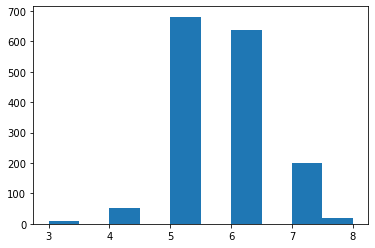

In [5]:
plt.hist(df["quality"])

In [6]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [7]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [10]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

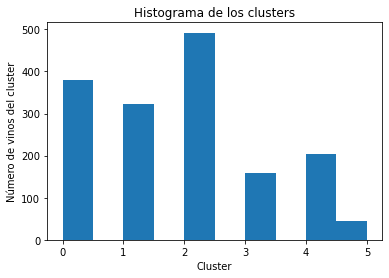

In [11]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [12]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
Z = linkage(df_norm, "ward")

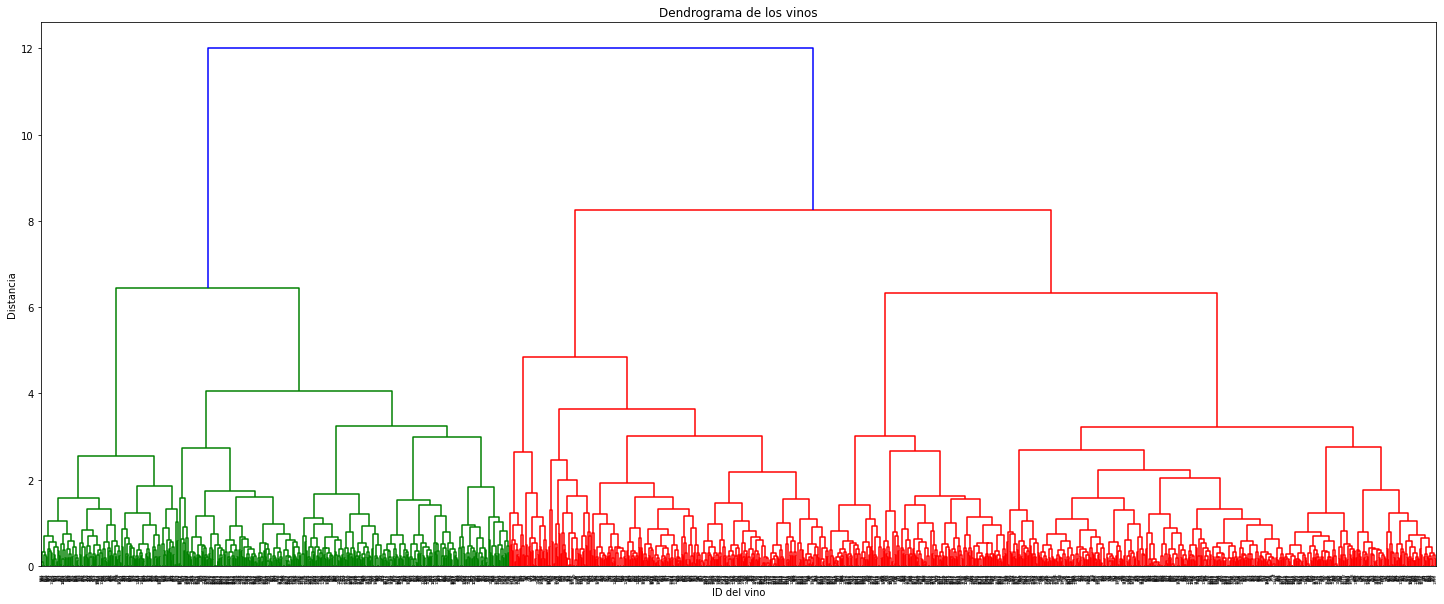

In [15]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

## K-means

In [16]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [17]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [18]:
model.labels_

array([2, 2, 2, ..., 4, 2, 3], dtype=int32)

In [19]:
md_k = pd.Series(model.labels_)

In [20]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [21]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2


(array([216.,   0., 297.,   0., 358.,   0., 246.,   0., 216., 266.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

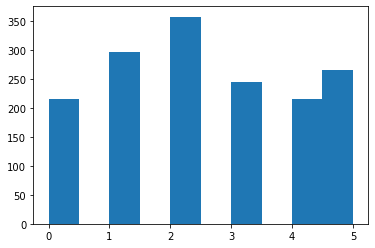

In [22]:
plt.hist(md_k)

In [23]:
model.cluster_centers_

array([[0.59099476, 0.20822235, 0.54398148, 0.13885718, 0.17548538,
        0.14769171, 0.10039589, 0.66266928, 0.31342957, 0.25529497,
        0.28615859, 0.54722222],
       [0.32880427, 0.28006088, 0.27414141, 0.08814169, 0.13219563,
        0.14008631, 0.13014717, 0.5213293 , 0.41978844, 0.18181818,
        0.20717431, 0.48080808],
       [0.23836951, 0.38502525, 0.06706704, 0.09327887, 0.12084853,
        0.16407664, 0.10570109, 0.47994651, 0.52192847, 0.15264443,
        0.23688583, 0.42625698],
       [0.37790489, 0.15696347, 0.43670732, 0.10557969, 0.10683795,
        0.16357495, 0.08302451, 0.41122274, 0.41021702, 0.23944793,
        0.50075047, 0.71056911],
       [0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311, 0.61759259],
       [0.31888349, 0.27608405, 0.3087218 , 0.16430631, 0.12829653,
        0.40980091, 0.31292011, 0.54078478, 0.42960748, 0.19179686,
        0.22068633,

In [24]:
model.inertia_

188.56101989654408

## Interpretación final

In [25]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.590995,0.208222,0.543981,0.138857,0.175485,0.147692,0.100396,0.662669,0.313430,0.255295,0.286159,0.547222,2.592593
1,0.328804,0.280061,0.274141,0.088142,0.132196,0.140086,0.130147,0.521329,0.419788,0.181818,0.207174,0.480808,1.531987
2,0.238370,0.385025,0.067067,0.093279,0.120849,0.164077,0.105701,0.479947,0.521928,0.152644,0.236886,0.426257,2.134078
3,0.377905,0.156963,0.436707,0.105580,0.106838,0.163575,0.083025,0.411223,0.410217,0.239448,0.500750,0.710569,0.077236
4,0.175516,0.317605,0.096343,0.093702,0.095437,0.247718,0.124117,0.319659,0.577063,0.187431,0.498243,0.617593,3.412037
5,0.318883,0.276084,0.308722,0.164306,0.128297,0.409801,0.312920,0.540785,0.429607,0.191797,0.220686,0.455639,1.056391
